In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
dataset_path = "/Users/sumukh/Downloads/data"  
categories = ["Cat", "Dog"]
img_size = 100 

In [ ]:
def load_images():
    data = []
    labels = []
    for label, category in enumerate(categories):
        folder_path = os.path.join(dataset_path, category)
        for filename in os.listdir(folder_path):
            img_path = os.path.join(folder_path, filename)
            try:
                img = cv2.imread(img_path)
                img = cv2.resize(img, (img_size, img_size))
                img = img.flatten()  # Convert to 1D array
                data.append(img)
                labels.append(label)
            except:
                pass
    return np.array(data), np.array(labels)

X, y = load_images()
print(f"Dataset loaded: {len(X)} samples")

Dataset loaded: 1152 samples


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))

SVM Accuracy: 0.645021645021645


In [ ]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))

Random Forest Accuracy: 0.6493506493506493


In [ ]:
def predict_image(img_path, model):
    try:
        img = cv2.imread(img_path)
        img = cv2.resize(img, (img_size, img_size))
        img = img.flatten().reshape(1, -1)
        pred = model.predict(img)[0]
        return categories[pred]
    except:
        return "None"


In [ ]:
new_img_path = "/Users/sumukh/Downloads/Dog_Breeds.jpg"  
print("SVM Prediction:", predict_image(new_img_path, svm_model))
print("Random Forest Prediction:", predict_image(new_img_path, rf_model))

SVM Prediction: Dog
Random Forest Prediction: Dog


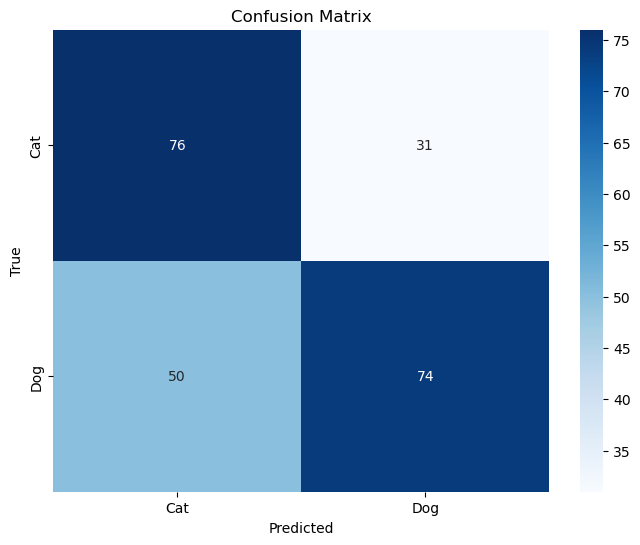

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()
plot_confusion_matrix(y_test, rf_pred)

In [20]:
svm_train_accuracy = accuracy_score(y_train, svm_model.predict(X_train))
svm_test_accuracy = accuracy_score(y_test, svm_pred)
print(f"SVM Train Accuracy: {svm_train_accuracy:.2f}")
print(f"SVM Test Accuracy: {svm_test_accuracy:.2f}")

rf_train_accuracy = accuracy_score(y_train, rf_model.predict(X_train))
rf_test_accuracy = accuracy_score(y_test, rf_pred)
print(f"RF Train Accuracy: {rf_train_accuracy:.2f}")
print(f"RF Test Accuracy: {rf_test_accuracy:.2f}")

SVM Train Accuracy: 1.00
SVM Test Accuracy: 0.65
RF Train Accuracy: 1.00
RF Test Accuracy: 0.65
